In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Change current working directory to one folder above
import os
os.chdir('..')

In [5]:
df = pd.read_csv("processing_outputs/cleaned_data.csv")
df

,rera_ids,far,number_of_towers,total_unit_count,1_5BHK_count,1BHK_count,1RK_count,2_5BHK_count,2BHK_count,3_5BHK_count,...,5BHK,avg_price,airport_distance_kms,ksr_jn_distance_kms,yeshwantpur_jn_distance_kms,nearest_metro_dist_kms,nearest_metro_station,nearest_major_road_dist_kms,nearest_major_road,project_duration
0,PRM/KA/RERA/1251/446/PR/191022/005340,2.000000,1.0,126,0.0,0.0,0.0,0.0,61.0,0.0,...,0,8.50,30.743633,18.789358,24.737635,6.197776,Nallurahalli,4.717755,Outer Ring Road,3.819302
1,PRM/KA/RERA/1251/446/PR/150224/006619,2.250000,1.0,84,0.0,0.0,0.0,0.0,52.0,0.0,...,0,6.25,17.722085,16.062128,18.537574,4.735450,Singayyanapalya,1.975241,Old Madras Road,2.045175
2,PRM/KA/RERA/1251/446/PR/300924/007102,2.200000,1.0,60,0.0,0.0,0.0,0.0,28.0,0.0,...,0,8.02,16.838685,11.915246,11.929444,7.787598,Benniganahalli,2.774341,Nagawara Flyover,2.932238
3,PRM/KA/RERA/1251/310/PR/051224/007268,2.490000,1.0,126,0.0,2.0,0.0,0.0,0.0,0.0,...,0,9.00,37.695984,25.095496,31.528721,13.506856,Nallurahalli,11.878441,Outer Ring Road Underpass,3.496235
4,PRM/KA/RERA/1251/308/PR/210524/006935,1.560000,1.0,166,0.0,0.0,0.0,0.0,0.0,0.0,...,0,13.43,40.058996,18.659459,25.630953,12.408801,Yelachenahalli,2.580445,Hosur Road,4.996578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,PRM/KA/RERA/1251/310/PR/180122/004645,2.175072,1.0,225,0.0,31.0,0.0,64.0,33.0,0.0,...,0,NaN,30.122094,1.579987,7.486775,1.181454,Magadi Road,0.506145,"['BGS Flyover', 'Bala Gangadhara Swamy Flyover']",4.835044
943,PRM/KA/RERA/1251/309/PR/070222/004675,2.250000,1.0,104,0.0,0.0,0.0,0.0,18.0,0.0,...,0,NaN,21.164953,13.711264,17.396020,1.161749,Singayyanapalya,0.123218,Old Madras Road,2.888433
944,PRM/KA/RERA/1251/446/PR/240122/004654,2.390000,1.0,384,0.0,2.0,48.0,0.0,0.0,0.0,...,0,NaN,20.095579,21.528500,24.798591,3.257451,Whitefield (Kadugodi),5.437946,Old Madras Road,4.158795
945,PRM/KA/RERA/1251/446/PR/240122/004656,2.200200,1.0,312,0.0,0.0,0.0,0.0,14.0,0.0,...,0,NaN,34.492445,17.614179,24.253059,10.198788,Kundalahalli,5.285258,Outer Ring Road,3.493498


In [3]:
df

,rera_ids,far,number_of_towers,total_unit_count,1_5BHK_count,1BHK_count,1RK_count,2_5BHK_count,2BHK_count,3_5BHK_count,...,5BHK,avg_price,airport_distance_kms,ksr_jn_distance_kms,yeshwantpur_jn_distance_kms,nearest_metro_dist_kms,nearest_metro_station,nearest_major_road_dist_kms,nearest_major_road,project_duration
0,PRM/KA/RERA/1251/308/PR/210524/006935,1.560000,1,166,0.0,0.0,0.0,0.0,0.0,0.0,...,0,13.43,40.058996,18.659459,25.630953,12.408801,Yelachenahalli,2.580445,Hosur Road,4.996578
1,PRM/KA/RERA/1251/446/PR/300924/007102,2.200000,1,60,0.0,0.0,0.0,0.0,28.0,0.0,...,0,8.02,16.838685,11.915246,11.929444,7.787598,Benniganahalli,2.774341,Nagawara Flyover,2.932238
2,PRM/KA/RERA/1251/446/PR/150224/006619,2.250000,1,84,0.0,0.0,0.0,0.0,52.0,0.0,...,0,6.25,17.722085,16.062128,18.537574,4.735450,Singayyanapalya,1.975241,Old Madras Road,2.045175
3,PRM/KA/RERA/1251/446/PR/191022/005340,2.000000,1,126,0.0,0.0,0.0,0.0,61.0,0.0,...,0,8.50,30.743633,18.789358,24.737635,6.197776,Nallurahalli,4.717755,Outer Ring Road,3.819302
4,PRM/KA/RERA/1251/310/PR/051224/007268,2.490000,1,126,0.0,2.0,0.0,0.0,0.0,0.0,...,0,9.00,37.695984,25.095496,31.528721,13.506856,Nallurahalli,11.878441,Outer Ring Road Underpass,3.496235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,PRM/KA/RERA/1251/446/PR/240122/004656,2.200200,1,312,0.0,0.0,0.0,0.0,14.0,0.0,...,0,NaN,34.492445,17.614179,24.253059,10.198788,Kundalahalli,5.285258,Outer Ring Road,3.493498
943,PRM/KA/RERA/1251/446/PR/240122/004655,2.200200,1,88,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,34.484701,17.609773,24.248021,10.191105,Kundalahalli,5.278239,Outer Ring Road,3.493498
944,PRM/KA/RERA/1251/446/PR/240122/004654,2.390000,1,384,0.0,2.0,48.0,0.0,0.0,0.0,...,0,NaN,20.095579,21.528500,24.798591,3.257451,Whitefield (Kadugodi),5.437946,Old Madras Road,4.158795
945,PRM/KA/RERA/1251/310/PR/180122/004645,2.175072,1,225,0.0,31.0,0.0,64.0,33.0,0.0,...,0,NaN,30.122094,1.579987,7.486775,1.181454,Magadi Road,0.506145,"['BGS Flyover', 'Bala Gangadhara Swamy Flyover']",4.835044


In [4]:
df.dtypes

rera_ids                        object
far                            float64
number_of_towers                 int64
total_unit_count                 int64
1_5BHK_count                   float64
1BHK_count                     float64
1RK_count                      float64
2_5BHK_count                   float64
2BHK_count                     float64
3_5BHK_count                   float64
3BHK_count                     float64
4_5BHK_count                   float64
4BHK_count                     float64
5BHK_count                     float64
1_5BHK_mean_carpet_area        float64
1BHK_mean_carpet_area          float64
1RK_mean_carpet_area           float64
2_5BHK_mean_carpet_area        float64
2BHK_mean_carpet_area          float64
3_5BHK_mean_carpet_area        float64
3BHK_mean_carpet_area          float64
4_5BHK_mean_carpet_area        float64
4BHK_mean_carpet_area          float64
5BHK_mean_carpet_area          float64
cost_of_land_inr                 int64
district                 

In [5]:
# Prepare features and target
X = df[['latitude', 'longitude']]
y = df['taluk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train KNN model
# Start with k=5, you can experiment with different values
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
y_pred = knn.predict(X_test_scaled)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8263157894736842

In [10]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

         Anekal       0.82      1.00      0.90        33
 Bengaluru East       0.81      0.96      0.88        68
Bengaluru North       0.67      0.54      0.60        26
Bengaluru South       0.94      0.74      0.83        46
    Devanahalli       1.00      0.67      0.80         3
       Hosakote       1.00      0.67      0.80         3
      Yelahanka       0.78      0.64      0.70        11

       accuracy                           0.83       190
      macro avg       0.86      0.74      0.79       190
   weighted avg       0.83      0.83      0.82       190



In [11]:
# Find optimal k value
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    score = knn_temp.score(X_test_scaled, y_test)
    k_scores.append(score)

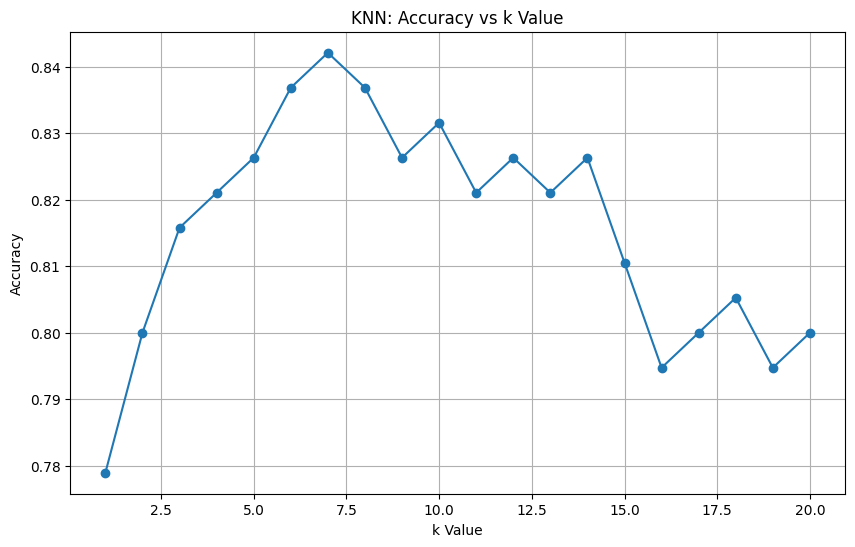

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k Value')
plt.grid(True)
plt.show()


In [13]:
# Best k value
best_k = k_range[np.argmax(k_scores)]
print(f"\nBest k value: {best_k} with accuracy: {max(k_scores):.3f}")


Best k value: 7 with accuracy: 0.842


In [14]:
# Retrain with best k
if best_k != 5:
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train_scaled, y_train)
    y_pred_best = knn_best.predict(X_test_scaled)
    print(f"Accuracy with k={best_k}: {accuracy_score(y_test, y_pred_best):.3f}")

Accuracy with k=7: 0.842


In [15]:
def predict_taluk(lat, lon):
    """Predict taluk for given latitude and longitude"""
    new_point = scaler.transform([[lat, lon]])
    prediction = knn.predict(new_point)
    probabilities = knn.predict_proba(new_point)
    
    print(f"Coordinates: ({lat}, {lon})")
    print(f"Predicted taluk: {prediction[0]}")
    print("Probabilities:")
    for i, prob in enumerate(probabilities[0]):
        print(f"  {knn.classes_[i]}: {prob:.3f}")
    
    return prediction[0]

In [16]:
predict_taluk(13.104,77.568)

Coordinates: (13.104, 77.568)
Predicted taluk: Yelahanka
Probabilities:
  Anekal: 0.000
  Bengaluru East: 0.000
  Bengaluru North: 0.400
  Bengaluru South: 0.000
  Devanahalli: 0.000
  Hosakote: 0.000
  Yelahanka: 0.600


/Users/abhineshkourav/Projects/deal_flow_iii/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Yelahanka'

In [17]:
# Save the model and scaler as pickle files
import pickle

# Save the trained model
with open('models/knn_taluk_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Save the scaler (important for preprocessing new data)
with open('models/taluk_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\n" + "="*50)
print("MODEL SAVED")
print("="*50)
print("✓ Model saved as 'knn_taluk_model.pkl'")
print("✓ Scaler saved as 'scaler.pkl'")




MODEL SAVED
✓ Model saved as 'knn_taluk_model.pkl'
✓ Scaler saved as 'scaler.pkl'


In [ ]:
with open('models/knn_taluk_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    
with open('models/taluk_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

In [19]:
lat, lon = 13.104, 77.568
#  Make prediction
new_point = loaded_scaler.transform([[lat, lon]])
prediction = loaded_model.predict(new_point)
probabilities = loaded_model.predict_proba(new_point)

print(f"Loaded model prediction for ({lat}, {lon}): {prediction[0]}")

Loaded model prediction for (13.104, 77.568): Yelahanka


/Users/abhineshkourav/Projects/deal_flow_iii/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
